# Try for test case 01 using globcurrent data

## 14 days

## adapted from test05 of GlobCurrent

In [1]:
#%matplotlib inline
from parcels import Field, FieldSet, ParticleSet, JITParticle, plotTrajectoriesFile, AdvectionRK4, ErrorCode
import numpy as np
from datetime import timedelta, datetime

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import num2date, date2num

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
import matplotlib.ticker as mticker


* Case 1: Incident occurred on 10/09/2011, west coast of Denmark, ~40km SW of Ringkobing Fjord. Collision with a fishing vessel. Substance spilt was bunker fuel (IFO), Swedish coast impacted.
    * Approx: 55.791887, 7.696803

In [3]:
data_path_v01 = '/data/oceanparcels/input_data/ESA_WorldOceanCirculation/NorthAtlantic/'
fname_v01 = 'runWOC_NATL_4lb_v1_201109*.nc' #runWOC_NATL_4lb_v1_20110901.nc

In [4]:
outdir =  "/data/oceanparcels/output_data/data_LauraGN/outputs_parcels/WOC/Oil/"

# 4. Checking the outputs:

In [5]:
ds_00 = xr.open_dataset(outdir + "20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_00m_instantaneous-v1.0-fv1.0.nc")
ds_15 = xr.open_dataset(outdir + "20110910000000-WOC-L4-CURlag-NATL_oil_spill_drift_1H_15m_instantaneous-v1.0-fv1.0.nc")

# 4.1 Plotting:

Text(0.5, 1.0, '15m')

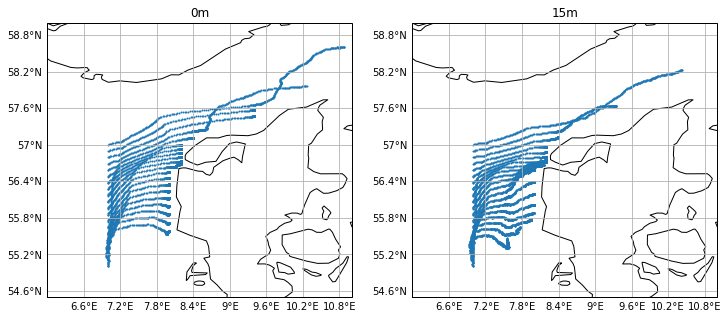

In [11]:
plt.figure(figsize=(12,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(ds_00['lon'], ds_00['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([6, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(ds_15['lon'], ds_15['lat'], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([6, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



Text(0.5, 1.0, '15m')

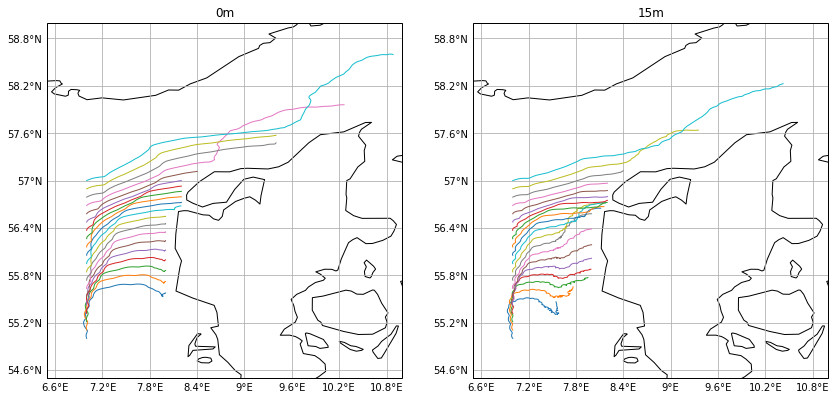

In [15]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)




Text(0.5, 1.0, '15m')

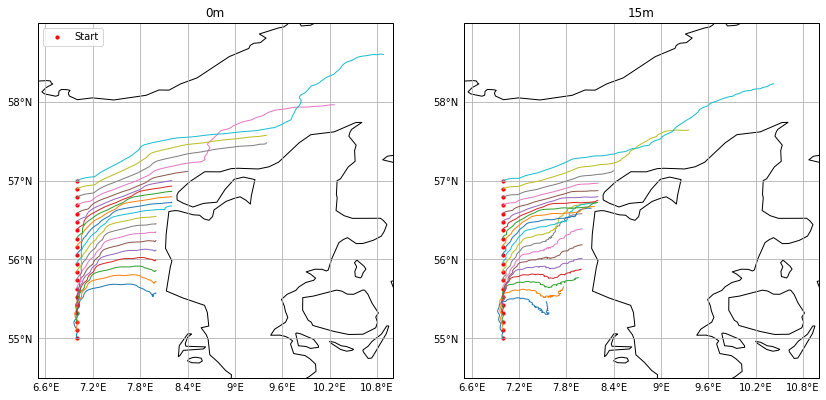

In [54]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree(), label='Start') #marker='o'
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,0], ds_00['lat'][:,0], c='r', s=10, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)



### 4.1.1 Plot with velocity data below:

In [6]:
ds_vel = xr.open_mfdataset(data_path_v01 + fname_v01)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/xarray/backends/api.py:931: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [8]:
ds_vel.depth

<xarray.DataArray 'depth' (depth: 2)>
array([ 0., 15.], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 15.0
Attributes:
    units:    meters

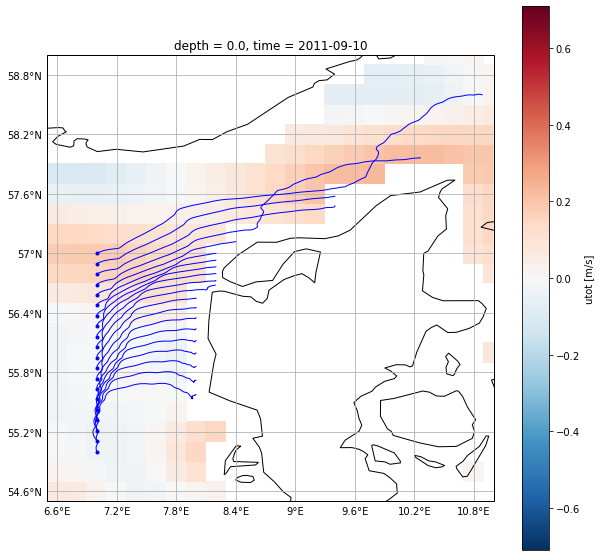

In [10]:
plt.figure(figsize=(10,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')

ds_vel.utot[216,0,:,:].plot(ax=ax1)

ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-b', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.plot(ds_00['lon'][:,0], ds_00['lat'][:,0], '.b', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


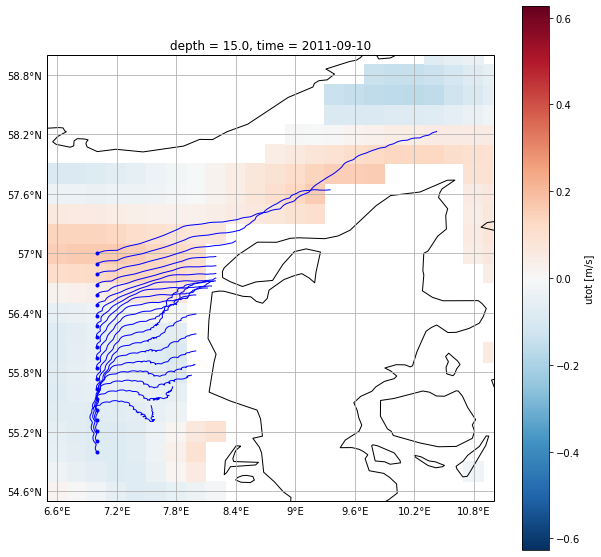

In [11]:
plt.figure(figsize=(10,10)) #(17,5)

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')

ds_vel.utot[216,1,:,:].plot(ax=ax1)

ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-b', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.plot(ds_15['lon'][:,0], ds_15['lat'][:,0], '.b', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# --> particles cross land??

# Masking particles:

In [21]:
ds_vel['mask'] = (('depth', 'lat', 'lon'), ds_vel.utot[0,:,:,:].to_masked_array().mask.astype('int')) 
#ds['nmap'] = (('y', 'x'), nmap)

In [22]:
mask_particles_00 = np.ones_like(ds_00['lat']) * np.nan

In [23]:
for tt in range(0, ds_00['lat'].shape[0]):
    for oo in range(0, ds_00['lat'].shape[1]):
            if np.isnan(ds_00['lat'][tt,oo]):
                continue
            else:
                mask_particles_00[tt,oo] = ds_vel.mask[0,:,:].sel(lat=ds_00['lat'][tt,oo], lon=ds_00['lon'][tt,oo], method='nearest')
# vel_mask[1,:,:] as 15m 


In [24]:
mask_particles_00[:,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0.], dtype=float32)

In [25]:
mask_particles_15 = np.ones_like(ds_15['lat']) * np.nan

In [26]:
for tt in range(0, ds_15['lat'].shape[0]):
    for oo in range(0, ds_15['lat'].shape[1]):
            if np.isnan(ds_15['lat'][tt,oo]):
                continue
            else:
                mask_particles_15[tt,oo] = ds_vel.mask[0,:,:].sel(lat=ds_15['lat'][tt,oo], lon=ds_15['lon'][tt,oo], method='nearest')
# vel_mask[1,:,:] as 15m 


In [27]:
mask_particles_15[:,-1]

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.], dtype=float32)

Text(0.5, 1.0, '15m')

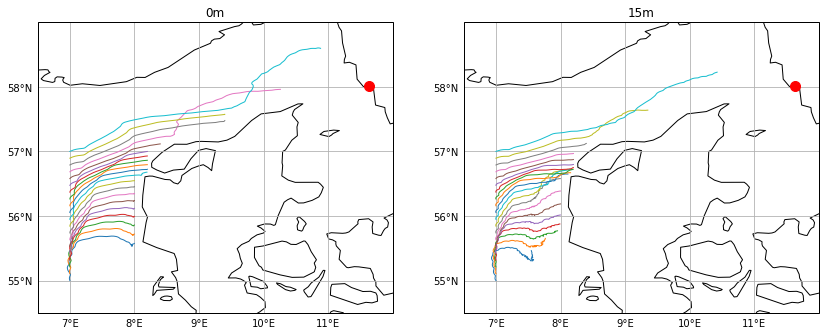

In [37]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
plt.plot(11.63, 58.01, transform=ccrs.PlateCarree(), marker='o', c='r', markersize=10)
ax1.set_xlim([6.5, 12])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
plt.plot(11.63, 58.01, transform=ccrs.PlateCarree(), marker='o', c='r', markersize=10)
ax1.set_xlim([6.5, 12])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)





In [46]:
ds_15.where(mask_particles_15==1.).lon[:,-1]

<xarray.DataArray 'lon' (traj: 20)>
array([      nan,       nan, 7.952718 , 7.98983  , 7.9973335, 7.998906 ,
       7.9988103, 7.997754 , 8.165371 , 8.174975 , 8.114791 , 8.155536 ,
       8.195698 , 8.199607 , 8.199951 , 8.199953 , 8.199955 , 8.399249 ,
       9.352211 ,       nan], dtype=float32)
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  longitude
    units:          degrees_east
    axis:           X

# Beached-non-beached:

Text(0.5, 1.0, '15m')

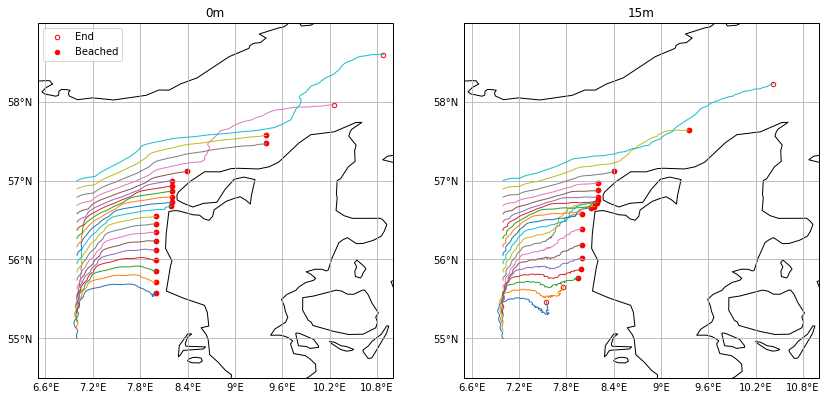

In [14]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,-1], ds_00['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_00.where(mask_particles_00==1.).lon[:,-1], ds_00.where(mask_particles_00==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree(), label='Beached') #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_15['lon'][:,-1], ds_15['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_15.where(mask_particles_15==1.).lon[:,-1], ds_15.where(mask_particles_15==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)




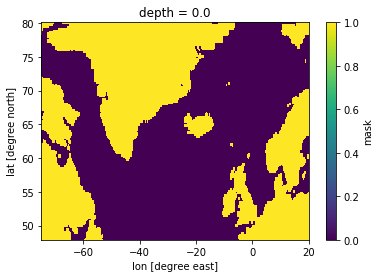

In [19]:
ds_vel.mask[0,:,:].plot()

Text(0.5, 1.0, '15m')

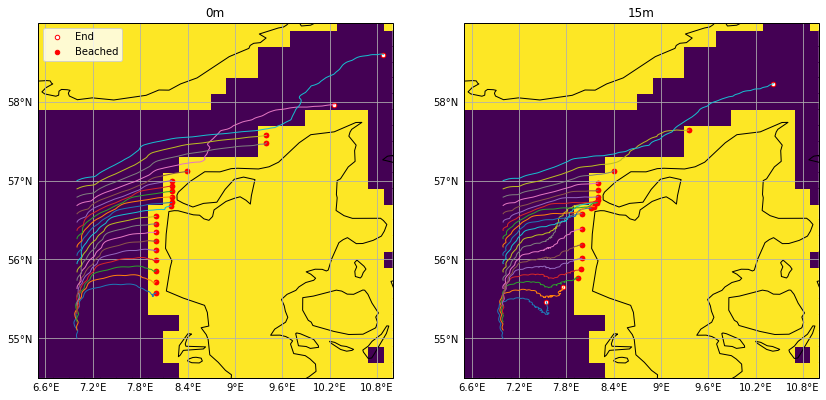

In [33]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ds_vel.mask[0,:,:].plot(ax=ax1, add_colorbar=False)
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,-1], ds_00['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_00.where(mask_particles_00==1.).lon[:,-1], ds_00.where(mask_particles_00==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree(), label='Beached') #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ds_vel.mask[1,:,:].plot(ax=ax1, add_colorbar=False)
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_15['lon'][:,-1], ds_15['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_15.where(mask_particles_15==1.).lon[:,-1], ds_15.where(mask_particles_15==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)




Text(0.5, 1.0, '15m')

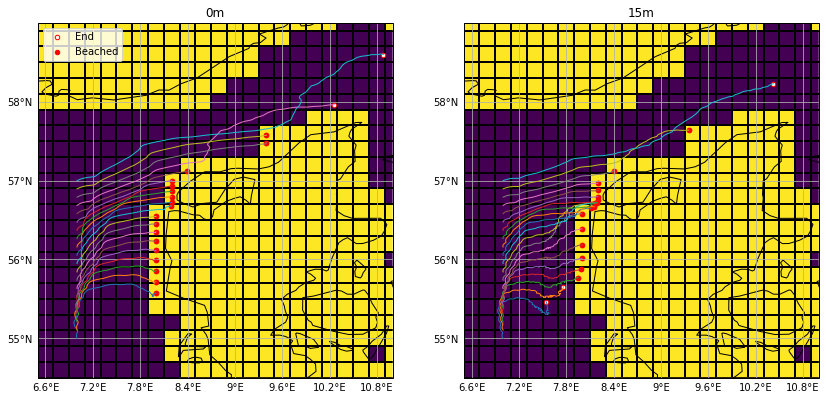

In [35]:
plt.figure(figsize=(14,10)) #(17,5)

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ds_vel.mask[0,:,:].plot.pcolormesh(ax=ax1, add_colorbar=False, edgecolor='k')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_00['lon'].T, ds_00['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_00['lon'][:,-1], ds_00['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_00.where(mask_particles_00==1.).lon[:,-1], ds_00.where(mask_particles_00==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree(), label='Beached') #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('0m', size=12)
ax1.legend(loc=2)

ax1 = plt.subplot(122, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ds_vel.mask[1,:,:].plot.pcolormesh(ax=ax1, add_colorbar=False, edgecolor='k')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.plot(ds_15['lon'].T, ds_15['lat'].T, '-', linewidth=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.scatter(ds_15['lon'][:,-1], ds_15['lat'][:,-1], c='w', s=20
            , transform=ccrs.PlateCarree(), label='End', edgecolor='r') #marker='o'
ax1.scatter(ds_15.where(mask_particles_15==1.).lon[:,-1], ds_15.where(mask_particles_15==1.).lat[:,-1]
            , c='r', s=20, transform=ccrs.PlateCarree()) #marker='o'

ax1.set_xlim([6.5, 11])
ax1.set_ylim([54.5, 59])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([54, 55, 56, 57, 58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('15m', size=12)




https://xarray.pydata.org/en/stable/user-guide/plotting.html#:~:text=Xarray%20plotting%20functionality%20is%20a,installed%20before%20xarray%20can%20plot.